In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
#importing the dataset
df = pd.read_csv('boston.csv')

In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [34]:
#variable independiente y dependiente
X_Boston = df.drop('price', axis=1)
Y_Boston = df['price']

In [35]:
#Shape
print(X_Boston.shape)
print(Y_Boston.shape)

(506, 13)
(506,)


In [36]:
#Atributos
X_Boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

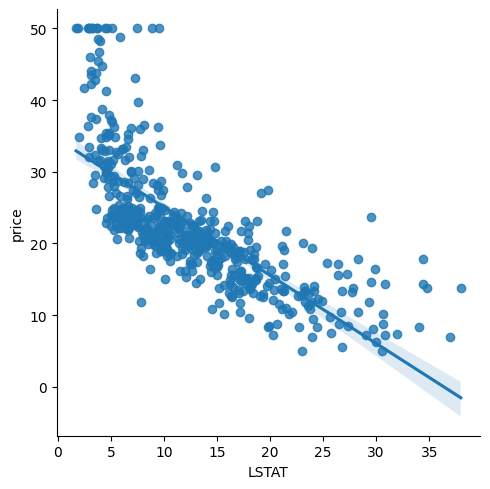

In [37]:
#Grafica de regresion
sns.lmplot(x='LSTAT', y='price', data=df)

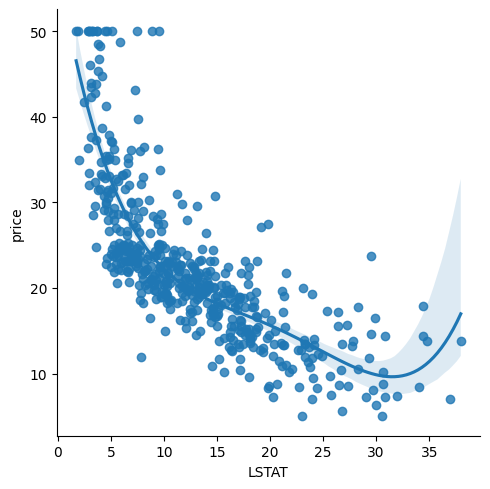

In [42]:
sns.lmplot(x='LSTAT', y='price', data=df, order=4)

<Axes: >

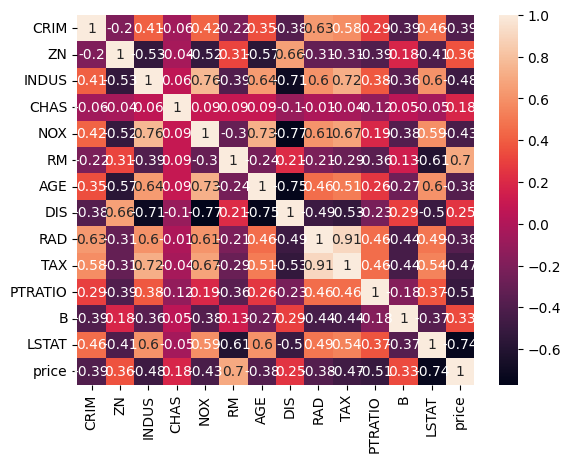

In [43]:
#matriz de correlacion
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [44]:
grid_columns=['RM','AGE', 'LSTAT', 'price']
df3 = df[grid_columns]

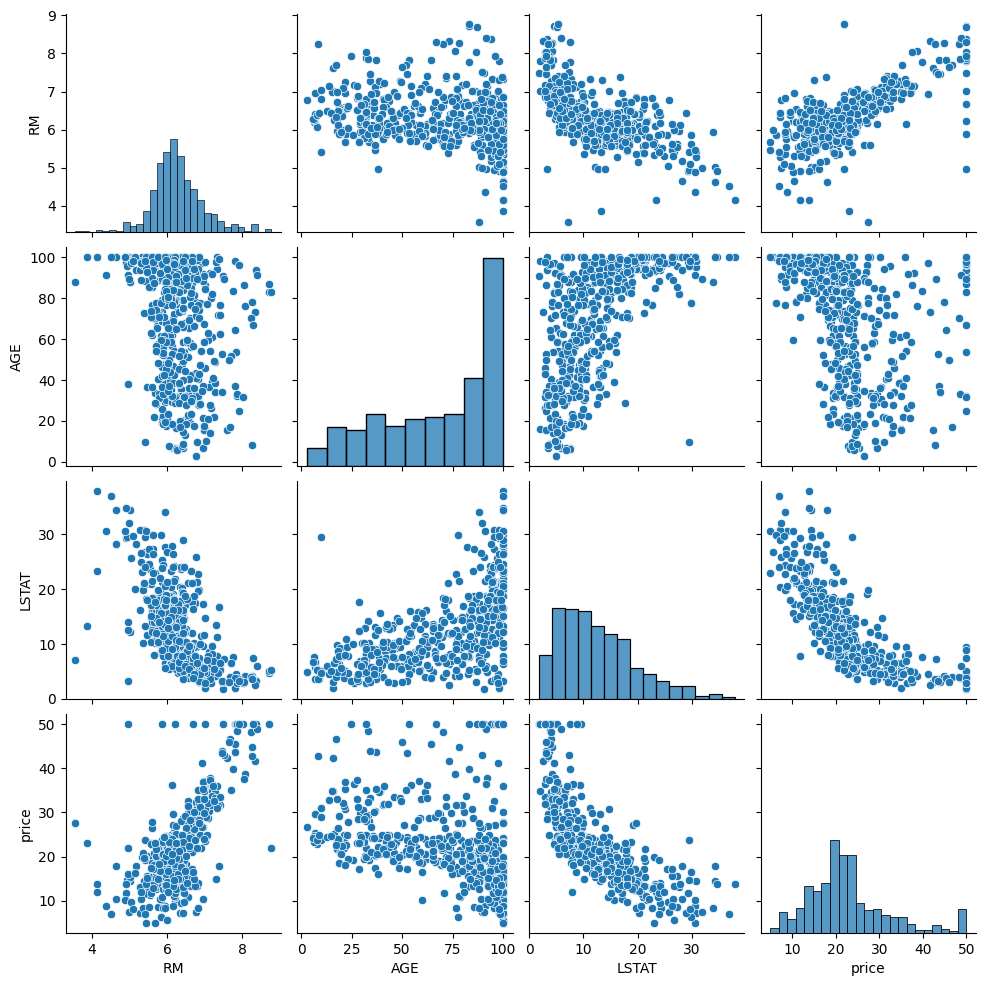

In [45]:
#grafica de cuadricula
sns.pairplot(df3)

### Modelo de regresion lineal

In [46]:
#importando librerias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [47]:
#crear datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_Boston, Y_Boston, test_size=0.2, random_state=0)

In [48]:
# Modelo de regresion
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [49]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [53]:
# analizamos el modelo de regresion
print('Coeficientes y intercepto' , regr.coef_, regr.intercept_)
print('Puntaje R2: ', r2_score(Y_train, y_train_pred))
print('Puntaje de prueba R2: ', r2_score(Y_test, y_test_pred))
print('Error cuadratico medio: ', mean_squared_error(Y_test, y_test_pred))

Coeficientes y intercepto [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01] 38.091694926303
Puntaje R2:  0.7730135569264234
Puntaje de prueba R2:  0.5892223849182503
Error cuadratico medio:  33.44897999767657


### Curva aprendizaje

In [54]:
train_scores = []
test_scores = []
train_mse = []
test_mse = []

In [55]:
for train_size in range (10, 100, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X_Boston, Y_Boston, test_size=train_size/100, random_state=0)
    regr.fit(X_train, Y_train)
    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)
    train_scores.append(r2_score(Y_train, y_train_pred))
    test_scores.append(r2_score(Y_test, y_test_pred))
    train_mse.append(mean_squared_error(Y_train, y_train_pred))
    test_mse.append(mean_squared_error(Y_test, y_test_pred))

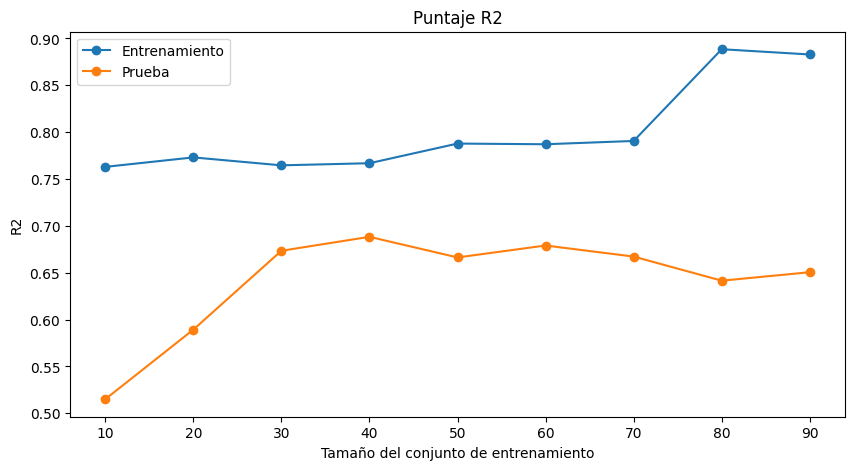

In [56]:
# Graficamos los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(10, 100, 10), train_scores, marker='o', label='Entrenamiento')
plt.plot(range(10, 100, 10), test_scores, marker='o', label='Prueba')
plt.title('Puntaje R2')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('R2')
plt.legend()
plt.show()

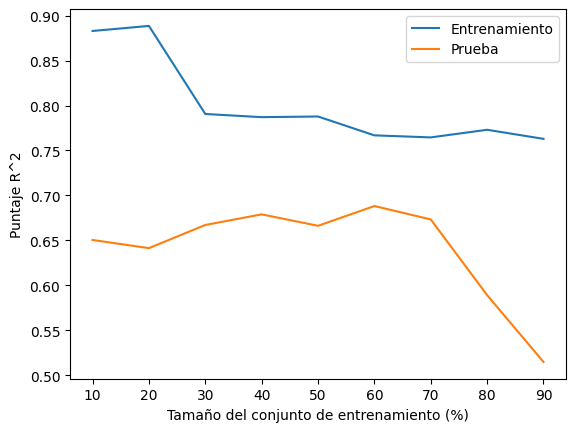

In [58]:
train_scores=[]
test_scores=[]
train_mse=[]
test_mse=[]

for train_size in range(10,100,10):
    X_train,X_test,y_train,y_test=train_test_split(X_Boston,Y_Boston,test_size=1-train_size/100,random_state=0)
    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    modeln=LinearRegression()
    modeln.fit(X_train_norm,y_train)
    #Calculamos y almacenamos el MSE y r2 para el conjunto de entrenamiento y el conjunto de prueba
    train_mse.append(mean_squared_error(y_train,modeln.predict(X_train_norm)))
    test_mse.append(mean_squared_error(y_test,modeln.predict(X_test_norm)))
    train_scores.append(r2_score(y_train,modeln.predict(X_train_norm)))
    test_scores.append(r2_score(y_test,modeln.predict(X_test_norm)))

import matplotlib.pyplot as plt
plt.plot(range(10,100,10), train_scores, label='Entrenamiento')
plt.plot(range(10,100,10), test_scores, label='Prueba')
plt.xlabel('Tamaño del conjunto de entrenamiento (%)')
plt.ylabel('Puntaje R^2')
plt.legend()
plt.show()

### Regularizacion de Lasso

In [59]:
from sklearn.linear_model import Lasso

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Boston, Y_Boston, test_size=0.2, random_state=0)

In [63]:
#Modelo de regresion con regularizacion Lasso
regr_lasso = Lasso(alpha=0.3)
regr_lasso.fit(X_train, y_train)

Lasso(alpha=0.3)

In [66]:
#predicciones
y_train_pred_lasso = regr_lasso.predict(X_train)
y_test_pred_lasso = regr_lasso.predict(X_test)

In [72]:
# analizamos el modelo de regresion lineal con Lasso
print('Coeficientes e intercepto',regr_lasso.coef_,regr_lasso.intercept_)
print('Puntaje de entrenamiento: ', r2_score(y_train,y_train_pred_lasso))
print('Puntaje de prueba: ', r2_score(y_test,y_test_pred_lasso))
print('MSE de entrenamiento: ', mean_squared_error(y_train,y_train_pred_lasso))
print('MSE de prueba: ', mean_squared_error(y_test,y_test_pred_lasso))

Coeficientes e intercepto [-0.09520526  0.03953847 -0.0307187   0.         -0.          3.50561162
 -0.01192938 -0.96705345  0.24362711 -0.01435395 -0.85920293  0.01024121
 -0.52685013] 27.623863537221624
Puntaje de entrenamiento:  0.7469669561522507
Puntaje de prueba:  0.48117301395971324
MSE de entrenamiento:  21.278650195767398
MSE de prueba:  44.63160376478047


In [69]:
# Analizar coeficientes
ind = np.argsort(np.abs(regr_lasso.coef_))